In [15]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline') 
get_ipython().magic(u"config InlineBackend.figure_format='retina'")
import os
import numpy as n
IB = os.environ.get('INSTABASE_URI',None) is not None
open = ib.open if IB else open

In [17]:
#Reggaeton
f = open('data_reggaeton.csv','rU')
reggaeton = pd.read_csv(f)
reggaeton = reggaeton.drop('Unnamed: 0', 1)
col_reg = list(reggaeton.columns.str.slice(0))
#Definir variable a predecir
reggaeton['marca_reggaeton'] = 1
reggaeton.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,marca_reggaeton
0,68,0.826,0.704,9,-7.527,1,0.1170,0.1890,0.000048,0.0617,0.741,94.013,205000,1,1
1,61,0.641,0.693,8,-7.327,1,0.1630,0.0169,0.000000,0.2190,0.899,214.058,184413,2,1
2,67,0.771,0.815,1,-5.423,0,0.0719,0.1610,0.000020,0.1890,0.524,94.016,205520,3,1
3,63,0.743,0.787,1,-5.402,1,0.2620,0.0352,0.000000,0.0732,0.719,192.117,172680,4,1
4,63,0.876,0.692,10,-6.429,1,0.1040,0.1280,0.000000,0.2490,0.757,95.032,227280,5,1


In [18]:
#Nombre de las columnas
names = reggaeton.columns.values
names

array(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'id_new', 'marca_reggaeton'], dtype=object)

       speechiness
count    70.000000
mean      0.120620
std       0.075096
min       0.032000
25%       0.064375
50%       0.090600
75%       0.161000
max       0.308000


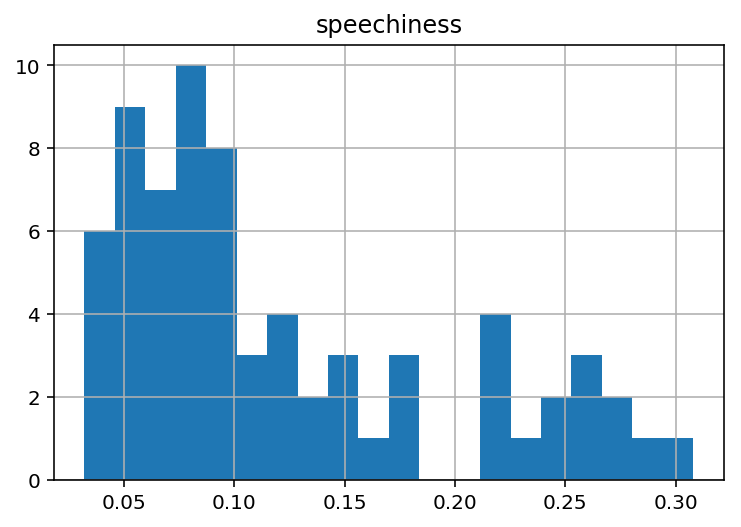

In [25]:
df = reggaeton[[names[6]]]
print df.describe()
df.hist(bins=20);

In [27]:
#Todo Tipo
f = open('data_todotipo.csv','rU')
todotipo = pd.read_csv(f)
todotipo = todotipo.drop('Unnamed: 0', 1)
todotipo = todotipo[col_reg]
todotipo['marca_reggaeton'] = 0
#Eliminar valores perdidos
todotipo = todotipo.dropna()
#Eliminar duplicados
todotipo = todotipo.drop_duplicates(subset=col_reg[1:][:-1], keep='last')
todotipo.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,marca_reggaeton
0,68.0,0.650,0.884,1.0,-3.557,1.0,0.0326,0.048200,0.154000,0.1350,0.377,125.998,200952.0,71,0
1,59.0,0.588,0.623,11.0,-8.027,0.0,0.0304,0.000288,0.451000,0.1840,0.169,135.993,417188.0,72,0
2,61.0,0.577,0.880,6.0,-2.916,1.0,0.0357,0.335000,0.896000,0.1430,0.259,127.951,204375.0,73,0
3,60.0,0.795,0.724,11.0,-6.532,0.0,0.0861,0.404000,0.000002,0.3740,0.445,123.998,219024.0,74,0
4,62.0,0.557,0.703,8.0,-2.062,0.0,0.0277,0.203000,0.000156,0.0927,0.228,150.037,233600.0,75,0


        popularity
count  2144.000000
mean     52.128731
std      17.174687
min       0.000000
25%      43.000000
50%      56.000000
75%      64.000000
max      98.000000


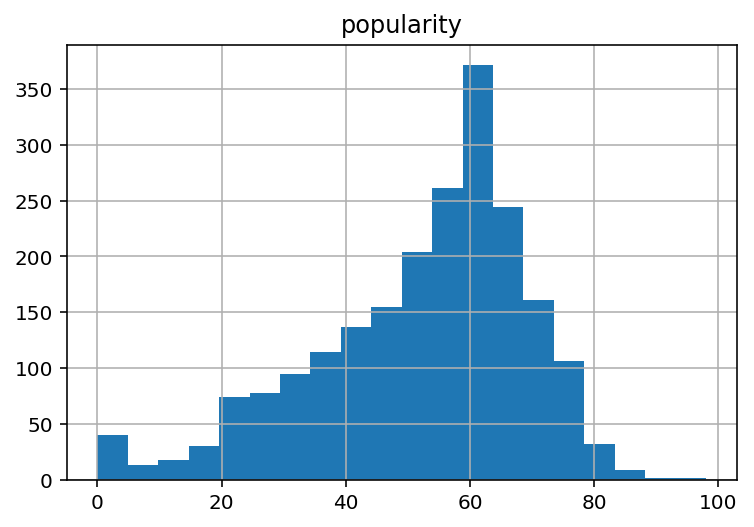

In [29]:
df = todotipo[[names[0]]]
print df.describe()
df.hist(bins=20);

In [30]:
def plot_pie(y):
    target_stats = Counter(y)
    labels = list(target_stats.keys())
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.pie(sizes, explode=explode, labels=labels, shadow=True,
           autopct='%1.1f%%')
    ax.axis('equal')
    
def get_hist(var1,var2,values_range=[0,1],nbins=20,normed=True,name_image='2hist.png'):
    
    common_params = dict(bins=nbins,range=values_range,normed=normed)
    plt.subplots_adjust(hspace=.8)
    plt.subplot(311)
    plt.title('Default')
    #plt.hist(df.popularity, **common_params)
    plt.hist(var1, **common_params)
    plt.hist(var2, **common_params)
    plt.subplot(312)
    plt.title('Skinny shift - 2 at a time')
    plt.hist((var1, var2), **common_params)
    plt.subplot(313)
    common_params['histtype'] = 'step'
    plt.title('With steps')
    #plt.hist(df.popularity, **common_params)
    plt.hist(var1, **common_params)
    plt.hist(var2, **common_params)

    plt.savefig(name_image, dpi = 400)
    plt.show()

In [41]:
len(names)

15

energy
count    70.000000
mean      0.778171
std       0.097774
min       0.533000
25%       0.700250
50%       0.790000
75%       0.863500
max       0.946000
Name: energy, dtype: float64


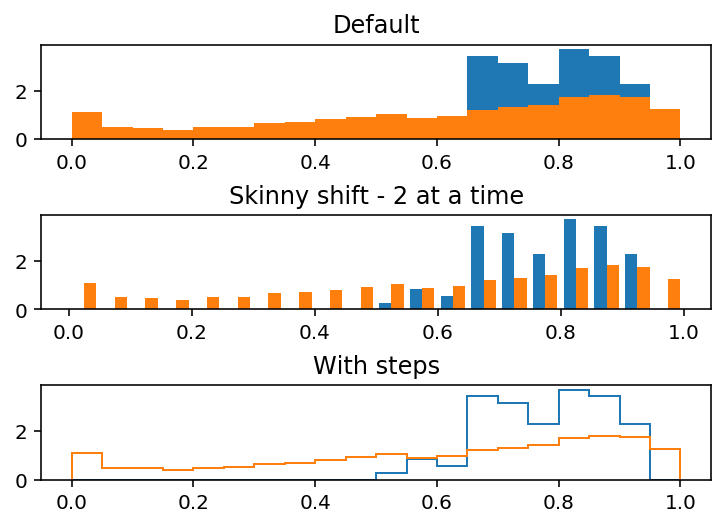

In [56]:
name = names[2]
print name
print reggaeton[name].describe()
df1 = reggaeton[[name]]
df2 = todotipo[[name]]
get_hist(df1.values,df2.values,values_range=[0,1])

                  count      mean       std      min      25%     50%     75%  \
marca_reggaeton                                                                 
0                2144.0  0.605638  0.283045  0.00181  0.40675  0.6705  0.8460   
1                  70.0  0.778171  0.097774  0.53300  0.70025  0.7900  0.8635   

                   max  
marca_reggaeton         
0                0.998  
1                0.946  


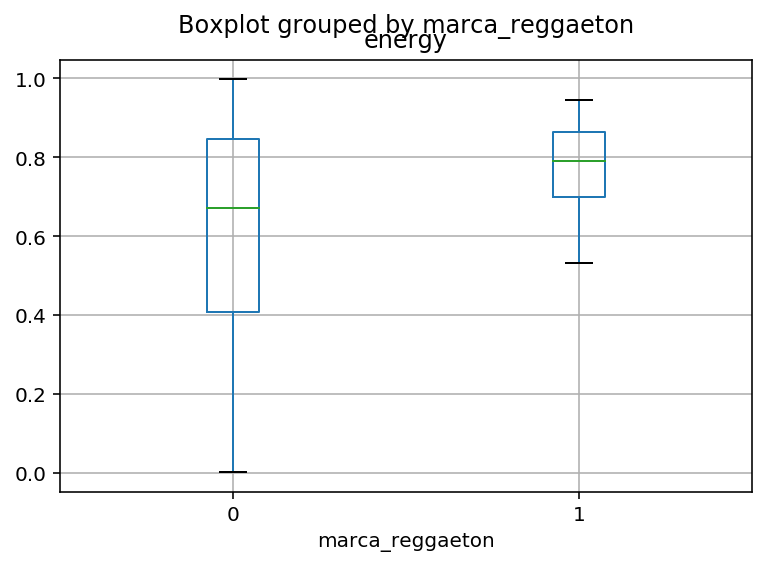

In [57]:
datos_base = pd.concat([reggaeton, todotipo])
print(datos_base.groupby('marca_reggaeton')[name].describe())
datos_base.boxplot(column=name,by='marca_reggaeton');

In [11]:
datos_base.corr()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,marca_reggaeton
popularity,1.000000,0.047287,-0.016875,0.015568,0.035118,0.024971,0.022186,-0.174139,0.043359,-0.085678,-0.168246,0.013057,-0.061438,-0.176134,0.049630
danceability,0.047287,1.000000,0.224485,0.033736,0.322819,-0.057926,0.109840,-0.234204,-0.223382,-0.052970,0.537763,-0.123195,-0.033138,-0.071243,0.215936
energy,-0.016875,0.224485,1.000000,0.021242,0.810098,-0.102117,0.062369,-0.758561,-0.503271,0.189069,0.397447,0.228765,0.177151,-0.106810,0.107577
key,0.015568,0.033736,0.021242,1.000000,0.021750,-0.191266,0.025771,-0.037373,-0.003857,0.032217,0.038923,0.004230,-0.003976,-0.011484,0.020176
loudness,0.035118,0.322819,0.810098,0.021750,1.000000,-0.088887,0.058270,-0.639013,-0.610270,0.141074,0.365615,0.177854,0.087879,-0.068440,0.095276
mode,0.024971,-0.057926,-0.102117,-0.191266,-0.088887,1.000000,-0.035882,0.061185,0.016735,-0.029901,-0.034449,0.022089,-0.059883,-0.050704,-0.009797
speechiness,0.022186,0.109840,0.062369,0.025771,0.058270,-0.035882,1.000000,-0.049369,0.008769,0.088151,0.026703,0.044250,-0.102705,0.104846,0.141705
acousticness,-0.174139,-0.234204,-0.758561,-0.037373,-0.639013,0.061185,-0.049369,1.000000,0.412336,-0.111758,-0.253913,-0.238229,-0.136426,0.113692,-0.093996
instrumentalness,0.043359,-0.223382,-0.503271,-0.003857,-0.610270,0.016735,0.008769,0.412336,1.000000,-0.124216,-0.413813,-0.097851,-0.122082,-0.013157,-0.106973
liveness,-0.085678,-0.052970,0.189069,0.032217,0.141074,-0.029901,0.088151,-0.111758,-0.124216,1.000000,-0.005975,0.033359,0.042995,0.013884,0.011155


In [13]:
pd.crosstab(datos_base.marca_reggaeton,datos_base.key, margins=True,normalize='index')

key,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
marca_reggaeton,,,,,,,,,,,,
0,0.127799,0.073694,0.118004,0.024254,0.090951,0.089552,0.066231,0.119869,0.049440,0.108675,0.057836,0.073694
1,0.057143,0.214286,0.057143,0.028571,0.028571,0.028571,0.085714,0.114286,0.085714,0.142857,0.085714,0.071429
All,0.125565,0.078139,0.116079,0.024390,0.088979,0.087624,0.066847,0.119693,0.050587,0.109756,0.058717,0.073622


In [14]:
#Normalización
for col in ['popularity','key','loudness','tempo','duration']:
    datos_base[col] = abs((datos_base[col] - datos_base[col].mean()) / (datos_base[col].max() - datos_base[col].min()))
datos_base.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,marca_reggaeton
count,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000,2214.000000
mean,0.137263,0.575009,0.611093,0.278843,0.104109,0.598013,0.069733,0.345507,0.213724,0.179859,0.535548,0.126539,0.039931,1152.175248,0.031617
std,0.106482,0.168223,0.280696,0.158680,0.104290,0.490410,0.064902,0.359138,0.351862,0.154536,0.274902,0.096573,0.046520,664.711242,0.175018
min,0.002871,0.062700,0.001810,0.018724,0.000009,0.000000,0.023100,0.000002,0.000000,0.018000,0.027900,0.000092,0.000047,1.000000,0.000000
25%,0.058353,0.463000,0.418000,0.163094,0.041109,0.000000,0.036000,0.024125,0.000004,0.089625,0.303000,0.052929,0.013372,574.250000,0.000000
50%,0.109374,0.587000,0.680000,0.291451,0.079967,1.000000,0.046500,0.186000,0.001385,0.118500,0.547500,0.108971,0.029678,1157.500000,0.000000
75%,0.191006,0.702000,0.847000,0.435822,0.126654,1.000000,0.073000,0.662750,0.316250,0.217750,0.771000,0.176698,0.053793,1731.750000,0.000000
max,0.533484,0.944000,0.998000,0.526731,0.777389,1.000000,0.668000,0.996000,0.985000,0.978000,0.982000,0.532902,0.870395,2300.000000,1.000000
